# Recipe Project

**Name(s)**: Ryan Lindberg

**Website Link**: lindbergryan04.github.io/reponame

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import plotly.express as px
import ast
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = 'plotly'
from dsc80_utils import * 

## Step 1: Introduction

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
food_data = pd.read_csv('data/RAW_recipes.csv')
interactions_data = pd.read_csv('data/RAW_interactions.csv')
interactions_data['recipe_id'] = interactions_data['recipe_id'].astype(int)
recipes = food_data.merge(interactions_data, how = 'left', right_on = 'recipe_id', left_on = 'id')
recipes = recipes.set_index('id').drop(columns = ['Unnamed: 0_x','Unnamed: 0_y','recipe_id'])

In [4]:
recipes

name  minutes  contributor_id  \
id                                                                              
333281          1 brownies in the world    best ever       40          985201   
453467            1 in canada chocolate chip cookies       45         1848091   
306168                        412 broccoli casserole       40           50969   
306168                        412 broccoli casserole       40           50969   
306168                        412 broccoli casserole       40           50969   
...                                              ...      ...             ...   
308080                     zydeco ya ya deviled eggs       40           37779   
298512        cookies by design   cookies on a stick       29          506822   
298509  cookies by design   sugar shortbread cookies       20          506822   
298509  cookies by design   sugar shortbread cookies       20          506822   
298509  cookies by design   sugar shortbread cookies       20          506822   

         submitted  ...       user_id        date  rating  \
id                  ...                                     
333281  2008-10-27  ...     386585.00  2008-11-19    4.00   
453467  2011-04-11  ...     424680.00  2012-01-26    5.00   
306168  2008-05-30  ...      29782.00  2008-12-31    5.00   
306168  2008-05-30  ...    1196280.00  2009-04-13    5.00   
306168  2008-05-30  ...     768828.00  2013-08-02    5.00   
...            ...  ...           ...         ...     ...   
308080  2008-06-07  ...     844554.00  2009-10-14    5.00   
298512  2008-04-15  ...     804234.00  2008-05-02    1.00   
298509  2008-04-15  ...     866651.00  2008-06-19    1.00   
298509  2008-04-15  ...    1546277.00  2010-02-08    5.00   
298509  2008-04-15  ... 1803287907.00  2014-11-01    0.00   

                                                   review  
id                                                         
333281  These were pretty good, but took forever to ba...  
453467  Originally I was gonna cut the recipe in half ...  
306168  This was one of the best broccoli casseroles t...  
306168  I made this for my son's first birthday party ...  
306168  Loved this.  Be sure to completely thaw the br...  
...                                                   ...  
308080  These were very good. I meant to add some jala...  
298512  I would rate this a zero if I could. I followe...  
298509  This recipe tastes nothing like the Cookies by...  
298509  yummy cookies, i love this recipe me and my sm...  
298509  I work at a Cookies By Design and can say this...  

[234429 rows x 15 columns]

## Understanding the Data

### Index
- **id:** Recipe ID

### Columns
- **name:** Recipe name
- **minutes:** Minutes required to prepare the recipe
- **contributor_id:** User ID who submitted the recipe
- **submitted:** Date the recipe was submitted
- **tags:** Food.com tags associated with the recipe
- **nutrition:** Nutrition information in the format:  
  `[calories (#), total fat (PDV), sugar (PDV), sodium (PDV), protein (PDV), saturated fat (PDV), carbohydrates (PDV)]`
- **n_steps:** Number of steps in the recipe
- **steps:** Text for the recipe steps, in order
- **description:** User-provided description of the recipe
- **user_id:** ID of the user who interacted with the recipe
- **date:** Date of the interaction
- **rating:** Rating given in the interaction
- **review:** Review text from the interaction

**Note:** Not all recipes have ratings due to the left merge, so some rows may have missing values for user_id, date, rating, and review.

### Possible Questions:

**1.** What types of recipes tend to be healthier (i.e. more protein, fewer carbs)?

**2.** What types of recipes tend to have higher average ratings?

**3.** What is the relationship between the number of steps and rating of recipes?

**4.** What is the relationship between nutritional metrics (e.g., calories, total fat, sugar) and user ratings?

**5.** Which recipes offer the best balance between healthiness, quick preparation, and taste?

**Motivation:**

Since I have transferred to UCSD, my cooking has devolved to become a bit less healthy due to lack of food access and lack of time. I'm curious about what ingredients/recipes I could  use to help me fix this issue. Ideally these recipes are cost effective in terms of time and money, and use simple ingredients available at the campus Target. Also, the food should be tasty of course!

I think **Question #5** will be the best to help me solve my predicament. 

## Step 2: Data Cleaning and Exploratory Data Analysis

### Cleaning

Repalce 0 ratings with np.nan:

In [5]:
recipes['rating'] = recipes['rating'].replace(0, np.nan)

Add avg_rating column (avg rating for each recipe):

In [6]:
recipes['avg_rating'] = recipes.groupby('id')['rating'].transform('mean')

Remove unnecessary columns:

In [7]:
recipes = recipes.drop(columns = ['review','contributor_id','user_id','date','submitted','description','steps'])

Convert string lists to actual lists:

For example: The string "['60-minutes-or-less', 'time-to-make', 'course']" from tags column, or the string '[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]' from nutrition column.

In [8]:
columns_to_convert = ['tags','nutrition','ingredients']  

for col in columns_to_convert:
    recipes[col] = recipes[col].apply(ast.literal_eval)

Parse nutrition lists into their own columns:

  `[calories (#), total fat (PDV), sugar (PDV), sodium (PDV), protein (PDV), saturated fat (PDV), carbohydrates (PDV)]`


In [9]:
recipes[[
    'calories',
    'total_fat',
    'sugar',
    'sodium',
    'protein',
    'sat_fat',
    'carbs'
]] = pd.DataFrame(recipes['nutrition'].tolist(), index=recipes.index)

In [10]:
recipes.columns

Index(['name', 'minutes', 'tags', 'nutrition', 'n_steps', 'ingredients',
       'n_ingredients', 'rating', 'avg_rating', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'sat_fat', 'carbs'],
      dtype='object')

In [11]:
recipes = recipes.drop(columns = ['nutrition','rating'])

In [12]:
recipes

name  minutes  \
id                                                              
333281          1 brownies in the world    best ever       40   
453467            1 in canada chocolate chip cookies       45   
306168                        412 broccoli casserole       40   
306168                        412 broccoli casserole       40   
306168                        412 broccoli casserole       40   
...                                              ...      ...   
308080                     zydeco ya ya deviled eggs       40   
298512        cookies by design   cookies on a stick       29   
298509  cookies by design   sugar shortbread cookies       20   
298509  cookies by design   sugar shortbread cookies       20   
298509  cookies by design   sugar shortbread cookies       20   

                                                     tags  n_steps  ...  \
id                                                                  ...   
333281  [60-minutes-or-less, time-to-make, course, mai...       10  ...   
453467  [60-minutes-or-less, time-to-make, cuisine, pr...       12  ...   
306168  [60-minutes-or-less, time-to-make, course, mai...        6  ...   
306168  [60-minutes-or-less, time-to-make, course, mai...        6  ...   
306168  [60-minutes-or-less, time-to-make, course, mai...        6  ...   
...                                                   ...      ...  ...   
308080  [60-minutes-or-less, time-to-make, course, mai...        7  ...   
298512  [30-minutes-or-less, time-to-make, course, pre...        9  ...   
298509  [30-minutes-or-less, time-to-make, course, pre...        5  ...   
298509  [30-minutes-or-less, time-to-make, course, pre...        5  ...   
298509  [30-minutes-or-less, time-to-make, course, pre...        5  ...   

       sodium  protein  sat_fat  carbs  
id                                      
333281   3.00     3.00    19.00   6.00  
453467  22.00    13.00    51.00  26.00  
306168  32.00    22.00    36.00   3.00  
306168  32.00    22.00    36.00   3.00  
306168  32.00    22.00    36.00   3.00  
...       ...      ...      ...    ...  
308080   3.00     6.00     5.00   0.00  
298512  11.00     7.00    21.00   9.00  
298509   4.00     4.00    11.00   6.00  
298509   4.00     4.00    11.00   6.00  
298509   4.00     4.00    11.00   6.00  

[234429 rows x 14 columns]

### Exploratory Analysis

**Eda**

What is the distribution of preparation times (minutes) across recipes?

How do ratings (as a proxy for taste) correlate with preparation time and nutritional metrics (e.g., calories, total fat, sugar, etc.)?

**what to look at**

Plot histograms of preparation times and ratings.

Create scatter plots comparing minutes versus rating, and overlay nutritional metrics (e.g., using color or size) to see if quicker recipes tend to have better or worse nutritional profiles.

Compute correlation matrices to quantify relationships between variables such as minutes, calories, fat, and rating.

How does preparation time (minutes) correlate to rating?

In [13]:
eda_recipes = recipes.copy()

Remove duplicate recipes:

In [14]:
eda_recipes = eda_recipes[~eda_recipes.index.duplicated(keep='first')]


Lets look at the descriptive statistics of rating and prep time:

In [16]:
print(eda_recipes['minutes'].describe())
print(eda_recipes['avg_rating'].describe())


count     83782.00
mean        115.03
std        3990.87
min           0.00
25%          20.00
50%          35.00
75%          65.00
max     1051200.00
Name: minutes, dtype: float64
count   81173.00
mean        4.63
std         0.64
min         1.00
25%         4.50
50%         5.00
75%         5.00
max         5.00
Name: avg_rating, dtype: float64


The mean rating for all recipes is 4.65, which is oddly high. On a 1-10 scale thats equivalent to 9.3. Either the recipes in this dataset are very good, or the ratings are biased towards higher values. 

In [17]:
eda_recipes = eda_recipes[eda_recipes['minutes'] < (60 * 4)]

In [18]:
eda_recipes_sample = eda_recipes.sample(n=5000, random_state=42)

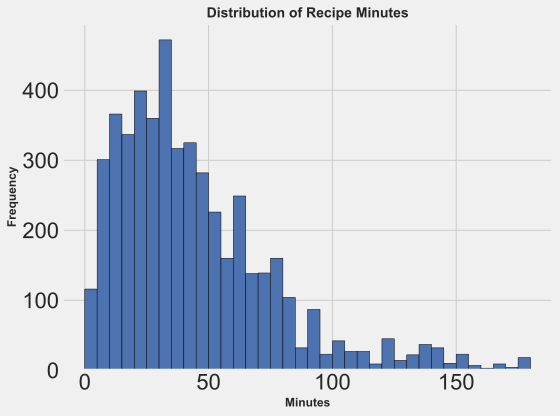

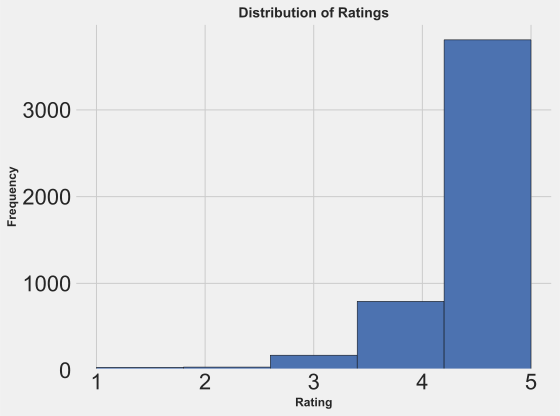

In [20]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
plt.hist(eda_recipes_sample['minutes'], bins=np.arange(0, 185, 5),
         edgecolor='black', color='#4c72b0')  # A pleasing blue

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Minutes", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Distribution of Recipe Minutes", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


plt.style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
plt.hist(eda_recipes_sample['avg_rating'], bins=5,
         edgecolor='black', color='#4c72b0')  # A pleasing blue

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Rating", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Distribution of Ratings", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Next, which nutritional values are most linearly correlated with rating?

In [22]:
# List of numeric columns you want to correlate
cols_to_correlate = [
    'avg_rating',
    'calories',
    'total_fat',
    'sugar',
    'sodium',
    'protein',
    'sat_fat',
    'carbs'
]

# Calculate the correlation matrix (Pearson correlation by default)
corr_matrix = eda_recipes_sample[cols_to_correlate].corr()

# Print the correlation matrix
print(corr_matrix)

            avg_rating  calories  total_fat  sugar  sodium  protein  sat_fat  \
avg_rating        1.00     -0.01      -0.01   0.00   -0.00    -0.01    -0.02   
calories         -0.01      1.00       0.90   0.62    0.24     0.69     0.83   
total_fat        -0.01      0.90       1.00   0.43    0.18     0.64     0.90   
sugar             0.00      0.62       0.43   1.00    0.11     0.13     0.47   
sodium           -0.00      0.24       0.18   0.11    1.00     0.26     0.15   
protein          -0.01      0.69       0.64   0.13    0.26     1.00     0.55   
sat_fat          -0.02      0.83       0.90   0.47    0.15     0.55     1.00   
carbs            -0.01      0.75       0.45   0.81    0.18     0.23     0.46   

            carbs  
avg_rating  -0.01  
calories     0.75  
total_fat    0.45  
sugar        0.81  
sodium       0.18  
protein      0.23  
sat_fat      0.46  
carbs        1.00  


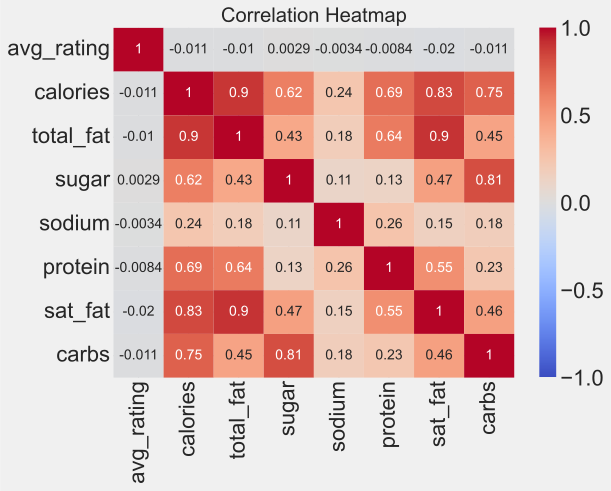

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,      # Annotate each cell with the correlation value
    cmap='coolwarm', # Color palette; try 'viridis', 'YlGnBu', etc.
    vmin=-1, vmax=1  # Correlation ranges from -1 to 1
)
plt.title("Correlation Heatmap")
plt.show()

It seems that no linear correlation between any nutritional metric and rating. My intuition would lead me to think maybe sugar and carbs would have some positive association. We can see that calories and fat are highly correlated, as well as sugar and carbs.

In [24]:
# List of numeric columns you want to correlate
cols_to_correlate = [
    'avg_rating',
    'minutes',
    'n_steps',
    'n_ingredients',
]

# Calculate the correlation matrix (Pearson correlation by default)
corr_matrix = eda_recipes[cols_to_correlate].corr()

# Print the correlation matrix
print(corr_matrix)

               avg_rating  minutes  n_steps  n_ingredients
avg_rating           1.00    -0.01    -0.00          -0.00
minutes             -0.01     1.00     0.36           0.31
n_steps             -0.00     0.36     1.00           0.44
n_ingredients       -0.00     0.31     0.44           1.00


So if the nutritional facts dont tell us about the rating, what does?

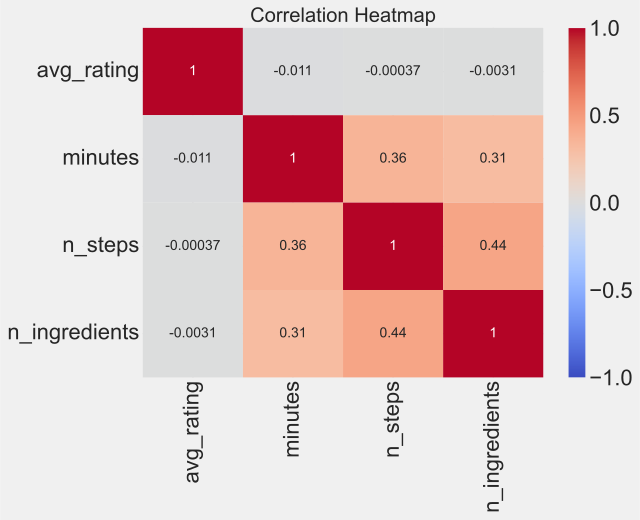

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,      # Annotate each cell with the correlation value
    cmap='coolwarm', # Color palette; try 'viridis', 'YlGnBu', etc.
    vmin=-1, vmax=1  # Correlation ranges from -1 to 1
)
plt.title("Correlation Heatmap")
plt.show()

In [34]:
# Ensure 'n_steps' and 'rating' are numeric
eda_recipes_sample['n_steps'] = pd.to_numeric(eda_recipes_sample['n_steps'], errors='coerce')
eda_recipes_sample['rating'] = pd.to_numeric(eda_recipes_sample['avg_rating'], errors='coerce')

# Create a pivot table that aggregates average rating and recipe count by number of steps
pivot_complexity = eda_recipes_sample.pivot_table(index='n_steps', values='avg_rating', aggfunc=['mean', 'count'])
pivot_complexity

mean      count
        avg_rating avg_rating
n_steps                      
1             4.72         59
2             4.68        164
3             4.71        252
4             4.58        254
5             4.62        338
6             4.61        416
7             4.65        400
8             4.66        400
9             4.60        351
10            4.59        341
11            4.67        307
12            4.69        238
13            4.62        229
14            4.61        198
15            4.60        160
16            4.61        122
17            4.71        109
18            4.58         95
19            4.79         70
20            4.72         55
21            4.71         52
22            4.67         40
23            4.77         31
24            4.72         25
25            4.80         25
26            4.43         22
27            4.59         19
28            4.85         13
29            4.57          7
30            4.67         11
31            4.94          2
32            4.90          5
33            4.88          4
34            4.70          4
35            4.75          2
36            4.67          3
37            5.00          1
38            5.00          1
39            5.00          1
40            4.00          2
41            5.00          4
42            5.00          1
44            5.00          1
45            5.00          1
46            1.00          1
50            5.00          1
52            5.00          1
55            5.00          1
51             NaN          0
59             NaN          0

So it seems that there is no linear correlation between rating and any of our variables. Lets take a look at the scatter plots to investigate further.

In [35]:
cols_to_scatter = [
    'calories',
    'total_fat',
    'sugar',
    'sodium',
    'protein',
    'sat_fat',
    'carbs',
    'n_steps',
    'minutes'
]

# 2) Melt the DataFrame from wide to long format
melted = eda_recipes_sample.melt(
    id_vars='avg_rating',         # keep 'rating' as is
    value_vars=cols_to_scatter, 
    var_name='nutrient',      # new column with nutrient name
    value_name='value'        # new column with the nutrient’s value
)

# 3) Use a relplot with facets
g = sns.relplot(
    data=melted,
    x='avg_rating', 
    y='value', 
    col='nutrient',       # create a separate subplot (facet) for each nutrient
    col_wrap=3,           # wrap into rows of 3 subplots
    kind='scatter',
    height=4, aspect=1.2, # tweak subplot size
    alpha=0.5             # transparency helps if points overlap
)
g.set_titles("{col_name}")  # Simplify subplot titles
plt.show()


## Step 3: Assessment of Missingness

In [37]:
# Print summary info about the DataFrame
recipes.info()

# Check for missing values in each column
missing_values = recipes.isnull().sum()
print("Missing values per column:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
Index: 234429 entries, 333281 to 298509
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           234428 non-null  object 
 1   minutes        234429 non-null  int64  
 2   tags           234429 non-null  object 
 3   n_steps        234429 non-null  int64  
 4   ingredients    234429 non-null  object 
 5   n_ingredients  234429 non-null  int64  
 6   avg_rating     231652 non-null  float64
 7   calories       234429 non-null  float64
 8   total_fat      234429 non-null  float64
 9   sugar          234429 non-null  float64
 10  sodium         234429 non-null  float64
 11  protein        234429 non-null  float64
 12  sat_fat        234429 non-null  float64
 13  carbs          234429 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 34.9+ MB
Missing values per column:
name                1
minutes             0
tags                0
n_steps      

Average rating is missing has 2777 missing values. This is due to the fact that some recipes never recieved a rating, as many users not leaving any rating with their review, causing it to default to 0. These 0 values were replaced with np.nan during the cleaning process. This is likely NMAR, because the value of the missing rating is dependent on the missing rating itself. This is something known as 'review bias,' which is the the phenomenon that describes how people tend to only leave ratings when they have a strong opinion on something. These users likely had a neutral opinion on the recipe, and therefore didn't feel compelled to give it a rating. 

## Step 4: Hypothesis Testing

In [ ]:
# TODO

## Step 5: Framing a Prediction Problem

2. Data Preprocessing and Feature Engineering
Extract Nutritional Data:
Parse the nutrition column into individual features (calories, total fat, sugar, sodium, protein, saturated fat, carbohydrates). This will allow you to standardize each metric.

Normalization:
Normalize each feature so that all metrics are on a similar scale. For example, convert calories and protein into z-scores or min–max scaled values.

Create Derived Metrics:

Healthiness Score: A possible formulation might be:
Healthiness = (Normalized Protein) – (Normalized Calories + Normalized Saturated Fat + Normalized Sodium)
(You can adjust the formula and include other nutrients as needed.)
Quickness Score: Compute something like:
Quickness = 1 / (1 + minutes)
so that lower preparation times yield a higher score.
Taste Score: Directly use the normalized average rating.

3. Constructing the Composite Score
Combine the three components using a weighted sum:

Composite Score
=
�
×
Healthiness Score
+
�
×
Taste Score
+
�
×
Quickness Score
Composite Score=α×Healthiness Score+β×Taste Score+γ×Quickness Score
Weights (α, β, γ):
These values represent how important each component is relative to the others. You can start with equal weights or adjust them based on your personal preference (e.g., if healthiness is your top priority, choose a higher α).


4. Model Development Options
You have a couple of paths for implementing this:

Rule-Based Model:
Start with the weighted sum approach described above. This is transparent and easy to adjust, especially if you don’t have a target variable that directly represents the “ideal” balance.

Supervised Machine Learning:
If you have historical data where recipes are labeled (or you can derive a target composite score from user interactions), you could train a regression model (e.g., linear regression, random forest, gradient boosting) to predict the composite score from the features.

Training Data: Use your engineered features (healthiness, quickness, taste) and any additional recipe metadata.
Validation: Apply cross-validation to ensure that your model generalizes well.
Multi-Criteria Decision Making (MCDM):
Techniques like the Analytic Hierarchy Process (AHP) or TOPSIS can also be used to rank recipes based on multiple attributes. This might be particularly useful if you want a model that doesn't necessarily require a large training dataset.

5. Implementation and Evaluation
Model Tuning:
Experiment with different weight combinations (α, β, γ) to see how your recipe rankings change. You might use grid search or a similar optimization technique to find the best performing combination.

Validation:
Compare the composite scores against user feedback (ratings or reviews) to check if higher scores correlate with better perceived recipes.

Iterative Refinement:
Gather feedback and adjust the model. For instance, if you notice that recipes with short preparation times but very unhealthy profiles are scoring too high, you might need to penalize the healthiness score more heavily.

## Step 6: Baseline Model

In [ ]:
# TODO

## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO